# Importing Libraries for Data Engineering

https://www.kaggle.com/code/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru

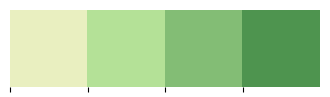

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
colors_nude = ['#E9EFC0','#B4E197','#83BD75','#4E944F'] #if wandring why greens ?to reinforce the emotion (prediction dollar$)
sns.palplot(sns.color_palette(colors_nude))
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
from scipy import stats
from scipy.stats import norm, skew
from sklearn.metrics import  mean_squared_error ,r2_score , explained_variance_score
from time import time
from sklearn.model_selection import GridSearchCV , learning_curve
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
sensors_data = pd.read_excel('Scattered path loss of 48 sensors for 2443 positions.xlsx', header=None)

In [3]:
sensors_data

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,103.267633,131.597806,81.831203,108.480113,126.401200,153.464898,112.979443,138.850280,95.879983,120.538335,...,109.733925,122.659778,95.395578,130.490611,73.119448,121.722946,104.559876,137.225660,91.041703,127.652224
1,91.665371,134.314718,83.926980,126.167508,127.048010,147.329908,113.967891,144.590411,97.747726,127.941590,...,113.915353,123.190051,95.157075,127.762477,66.005689,115.881671,107.128477,140.352729,86.947794,119.210396
2,108.052816,132.300121,76.009308,116.964033,132.173743,143.051777,115.162722,137.676604,102.738553,122.522861,...,112.052375,117.562515,99.313642,128.192048,75.164417,116.706805,112.276377,129.772121,88.276306,117.740004
3,101.053301,127.103974,84.735175,115.929306,118.353146,149.874228,106.017232,134.139507,98.226181,122.213773,...,108.861984,129.042510,98.180222,129.344039,66.522773,117.580686,107.813133,134.786828,91.081817,118.908161
4,108.955215,128.747209,82.213517,116.666273,125.771908,153.445316,111.663266,140.358840,96.138273,128.801601,...,108.706859,119.970422,100.514277,126.900903,71.984768,110.931963,113.277748,139.563546,92.386548,129.117372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,128.179344,114.641972,105.710144,88.287079,149.165563,137.537974,133.750673,112.015302,120.576864,112.474493,...,119.309378,112.129281,133.167988,114.383990,102.902100,74.953746,136.775728,135.511864,113.860294,97.289917
2439,126.365931,110.972446,103.198207,73.414657,146.420909,140.802299,136.087553,119.668856,117.611405,97.729138,...,119.776043,109.341785,134.167797,108.758001,97.232046,76.553890,131.527636,120.620501,114.793561,86.316080
2440,124.285145,103.360797,109.290753,79.003261,151.453751,138.577223,133.219135,111.313822,121.482318,115.272484,...,124.257271,108.008908,124.793498,110.650887,110.008857,71.785029,141.782071,125.802032,113.221141,91.163433
2441,128.455467,113.305564,120.534195,70.567774,150.202237,147.104822,128.145483,115.972568,118.499662,104.549275,...,125.544587,114.946916,128.766695,114.402412,100.797834,77.919668,139.414337,117.483786,123.049769,91.451389


In [4]:
position_data = pd.read_excel('real x-y-z positions of 2443 locations.xlsx', header=None)

In [5]:
position_data

,0,1,2
0,-45.581275,30.239368,-60.00
1,-45.188830,30.181623,-59.96
2,-44.791865,30.131806,-59.92
3,-44.390422,30.089935,-59.88
4,-43.984540,30.056029,-59.84
...,...,...,...
2438,-59.939858,51.788725,37.52
2439,-59.963718,51.389997,37.56
2440,-59.981583,50.990713,37.60
2441,-59.993448,50.591032,37.64


# Data Engineering

### Sensors Data -- Labeling Columns 

In [6]:
Sensors_Number_of_Columns = sensors_data.shape[1]

In [7]:
Sensors_columns = ["sensor" + str(x) for x in range(1,Sensors_Number_of_Columns + 1)]
sensors_data.columns = (Sensors_columns)

In [8]:
sensors_data

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,...,sensor39,sensor40,sensor41,sensor42,sensor43,sensor44,sensor45,sensor46,sensor47,sensor48
0,103.267633,131.597806,81.831203,108.480113,126.401200,153.464898,112.979443,138.850280,95.879983,120.538335,...,109.733925,122.659778,95.395578,130.490611,73.119448,121.722946,104.559876,137.225660,91.041703,127.652224
1,91.665371,134.314718,83.926980,126.167508,127.048010,147.329908,113.967891,144.590411,97.747726,127.941590,...,113.915353,123.190051,95.157075,127.762477,66.005689,115.881671,107.128477,140.352729,86.947794,119.210396
2,108.052816,132.300121,76.009308,116.964033,132.173743,143.051777,115.162722,137.676604,102.738553,122.522861,...,112.052375,117.562515,99.313642,128.192048,75.164417,116.706805,112.276377,129.772121,88.276306,117.740004
3,101.053301,127.103974,84.735175,115.929306,118.353146,149.874228,106.017232,134.139507,98.226181,122.213773,...,108.861984,129.042510,98.180222,129.344039,66.522773,117.580686,107.813133,134.786828,91.081817,118.908161
4,108.955215,128.747209,82.213517,116.666273,125.771908,153.445316,111.663266,140.358840,96.138273,128.801601,...,108.706859,119.970422,100.514277,126.900903,71.984768,110.931963,113.277748,139.563546,92.386548,129.117372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,128.179344,114.641972,105.710144,88.287079,149.165563,137.537974,133.750673,112.015302,120.576864,112.474493,...,119.309378,112.129281,133.167988,114.383990,102.902100,74.953746,136.775728,135.511864,113.860294,97.289917
2439,126.365931,110.972446,103.198207,73.414657,146.420909,140.802299,136.087553,119.668856,117.611405,97.729138,...,119.776043,109.341785,134.167797,108.758001,97.232046,76.553890,131.527636,120.620501,114.793561,86.316080
2440,124.285145,103.360797,109.290753,79.003261,151.453751,138.577223,133.219135,111.313822,121.482318,115.272484,...,124.257271,108.008908,124.793498,110.650887,110.008857,71.785029,141.782071,125.802032,113.221141,91.163433
2441,128.455467,113.305564,120.534195,70.567774,150.202237,147.104822,128.145483,115.972568,118.499662,104.549275,...,125.544587,114.946916,128.766695,114.402412,100.797834,77.919668,139.414337,117.483786,123.049769,91.451389


### Converting to Pandas Dataframe

In [9]:
sensors_data = pd.DataFrame(sensors_data)

### Position Data -- Labeling Columns

In [10]:
position_data.columns = ['PosX', 'PosY', 'PosZ']

In [11]:
position_data

,PosX,PosY,PosZ
0,-45.581275,30.239368,-60.00
1,-45.188830,30.181623,-59.96
2,-44.791865,30.131806,-59.92
3,-44.390422,30.089935,-59.88
4,-43.984540,30.056029,-59.84
...,...,...,...
2438,-59.939858,51.788725,37.52
2439,-59.963718,51.389997,37.56
2440,-59.981583,50.990713,37.60
2441,-59.993448,50.591032,37.64


### Converting to Pandas Dataframe

In [12]:
position_data = pd.DataFrame(position_data)

# Concatenating Dataframes

In [13]:
raw_data = pd.concat([sensors_data, position_data], axis = 1)
raw_data

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,...,sensor42,sensor43,sensor44,sensor45,sensor46,sensor47,sensor48,PosX,PosY,PosZ
0,103.267633,131.597806,81.831203,108.480113,126.401200,153.464898,112.979443,138.850280,95.879983,120.538335,...,130.490611,73.119448,121.722946,104.559876,137.225660,91.041703,127.652224,-45.581275,30.239368,-60.00
1,91.665371,134.314718,83.926980,126.167508,127.048010,147.329908,113.967891,144.590411,97.747726,127.941590,...,127.762477,66.005689,115.881671,107.128477,140.352729,86.947794,119.210396,-45.188830,30.181623,-59.96
2,108.052816,132.300121,76.009308,116.964033,132.173743,143.051777,115.162722,137.676604,102.738553,122.522861,...,128.192048,75.164417,116.706805,112.276377,129.772121,88.276306,117.740004,-44.791865,30.131806,-59.92
3,101.053301,127.103974,84.735175,115.929306,118.353146,149.874228,106.017232,134.139507,98.226181,122.213773,...,129.344039,66.522773,117.580686,107.813133,134.786828,91.081817,118.908161,-44.390422,30.089935,-59.88
4,108.955215,128.747209,82.213517,116.666273,125.771908,153.445316,111.663266,140.358840,96.138273,128.801601,...,126.900903,71.984768,110.931963,113.277748,139.563546,92.386548,129.117372,-43.984540,30.056029,-59.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,128.179344,114.641972,105.710144,88.287079,149.165563,137.537974,133.750673,112.015302,120.576864,112.474493,...,114.383990,102.902100,74.953746,136.775728,135.511864,113.860294,97.289917,-59.939858,51.788725,37.52
2439,126.365931,110.972446,103.198207,73.414657,146.420909,140.802299,136.087553,119.668856,117.611405,97.729138,...,108.758001,97.232046,76.553890,131.527636,120.620501,114.793561,86.316080,-59.963718,51.389997,37.56
2440,124.285145,103.360797,109.290753,79.003261,151.453751,138.577223,133.219135,111.313822,121.482318,115.272484,...,110.650887,110.008857,71.785029,141.782071,125.802032,113.221141,91.163433,-59.981583,50.990713,37.60
2441,128.455467,113.305564,120.534195,70.567774,150.202237,147.104822,128.145483,115.972568,118.499662,104.549275,...,114.402412,100.797834,77.919668,139.414337,117.483786,123.049769,91.451389,-59.993448,50.591032,37.64


# Exploratory Data Analysis

In [14]:
raw_data.sample(5)

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,...,sensor42,sensor43,sensor44,sensor45,sensor46,sensor47,sensor48,PosX,PosY,PosZ
1484,153.052816,148.124737,117.752205,120.084496,123.496233,124.212724,89.008754,96.543639,150.250453,139.657906,...,137.750482,107.703067,104.298393,118.972624,127.308817,90.248100,96.074061,59.233637,56.291331,-0.64
1040,116.494817,125.381994,103.598811,105.113367,129.965053,135.711274,96.601362,110.964356,116.714116,124.849991,...,124.831025,83.853090,85.011703,116.949603,124.510675,82.358988,99.798767,-6.729152,54.457798,-18.40
1149,113.909267,125.736112,82.642995,94.862549,148.501486,152.225748,117.276494,130.035203,122.225713,119.454058,...,126.255096,80.743811,88.518959,130.652388,132.725003,102.102027,110.581946,-55.974125,63.438645,-14.04
393,117.624267,139.564417,91.148046,119.340761,120.918458,136.684255,98.517114,114.822645,113.712762,135.030937,...,135.562499,78.290112,104.977388,110.077201,128.892051,73.425290,111.164130,4.461421,47.033953,-44.28
895,139.023549,141.411735,118.200100,130.925033,110.321588,123.075756,78.250897,104.831223,125.441156,137.929154,...,131.243000,105.705698,120.638944,108.991881,118.620658,78.854463,106.170555,58.376117,41.007051,-24.20


In [15]:
print("The Shape of the Dataset is : ",raw_data.shape)
print("************************************************************************************************************")
print("Column Names of the Dataset are : ",raw_data.columns)
print("************************************************************************************************************")
print(raw_data.info())
print("************************************************************************************************************")
raw_data.describe(include='all')

The Shape of the Dataset is :  (2443, 51)
************************************************************************************************************
Column Names of the Dataset are :  Index(['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6',
       'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12',
       'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18',
       'sensor19', 'sensor20', 'sensor21', 'sensor22', 'sensor23', 'sensor24',
       'sensor25', 'sensor26', 'sensor27', 'sensor28', 'sensor29', 'sensor30',
       'sensor31', 'sensor32', 'sensor33', 'sensor34', 'sensor35', 'sensor36',
       'sensor37', 'sensor38', 'sensor39', 'sensor40', 'sensor41', 'sensor42',
       'sensor43', 'sensor44', 'sensor45', 'sensor46', 'sensor47', 'sensor48',
       'PosX', 'PosY', 'PosZ'],
      dtype='object')
************************************************************************************************************
<class 'pandas.core.frame.Da

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,...,sensor42,sensor43,sensor44,sensor45,sensor46,sensor47,sensor48,PosX,PosY,PosZ
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,...,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000
mean,129.520130,133.780501,104.462099,110.450076,128.595627,133.391181,103.272045,109.726055,124.701813,128.010306,...,125.263258,91.123794,98.591957,119.624760,124.936219,90.600711,98.341490,1.587217,50.342157,-11.160000
std,12.182080,12.330503,14.952531,15.769194,12.737396,12.043886,15.862698,14.681821,11.901381,12.007304,...,10.139607,12.102077,13.068165,10.116794,10.060208,13.049884,12.415964,41.974722,14.164250,28.215107
min,91.665371,99.171297,64.891828,66.368265,93.169908,99.137912,57.953785,70.062967,87.817782,93.152801,...,92.464922,52.768022,58.341795,91.353260,94.756293,53.592624,63.470231,-59.999924,30.000015,-60.000000
25%,120.914118,124.723676,93.258509,99.107826,119.372028,125.146667,91.246071,99.232216,116.447017,119.564911,...,117.702666,82.072080,89.513329,112.657323,118.103115,81.275663,88.904424,-39.527147,36.118033,-35.580000
50%,130.112275,133.261726,104.599125,111.491363,127.779291,133.826057,103.869465,111.045237,124.854551,127.507417,...,125.060542,91.603602,99.211583,119.438926,125.384501,91.469233,98.758381,2.638047,50.895260,-11.160000
75%,138.529701,143.105289,116.275822,122.201802,137.560467,142.507457,115.286522,120.578263,133.712263,137.057920,...,132.427154,99.913608,108.253040,126.331698,132.368420,100.211181,108.069122,43.349064,64.452757,13.260000
max,160.413412,170.924619,143.914782,150.959576,162.059422,165.695254,145.462122,146.995244,155.844108,162.528384,...,153.214361,127.840963,133.436651,150.951445,154.995619,124.404066,135.464393,60.000000,69.999999,37.680000


In [16]:
print(raw_data.isnull().any())

sensor1     False
sensor2     False
sensor3     False
sensor4     False
sensor5     False
sensor6     False
sensor7     False
sensor8     False
sensor9     False
sensor10    False
sensor11    False
sensor12    False
sensor13    False
sensor14    False
sensor15    False
sensor16    False
sensor17    False
sensor18    False
sensor19    False
sensor20    False
sensor21    False
sensor22    False
sensor23    False
sensor24    False
sensor25    False
sensor26    False
sensor27    False
sensor28    False
sensor29    False
sensor30    False
sensor31    False
sensor32    False
sensor33    False
sensor34    False
sensor35    False
sensor36    False
sensor37    False
sensor38    False
sensor39    False
sensor40    False
sensor41    False
sensor42    False
sensor43    False
sensor44    False
sensor45    False
sensor46    False
sensor47    False
sensor48    False
PosX        False
PosY        False
PosZ        False
dtype: bool


https://www.kaggle.com/code/mahmoudftolba/a-detailed-regression-eda-for-beginners
    
https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions/code?datasetId=93959&sortBy=voteCount
    
https://www.kaggle.com/code/mustafaashraf/emotions-svm-roc
    
https://www.kaggle.com/code/fathihilmi/final-year-project-gru
    
https://www.kaggle.com/code/ssunssai/prediction-emotion-from-eeg-signal
    
https://www.kaggle.com/code/shreyaspj/detecting-emotions-using-eeg-waves
    
https://www.kaggle.com/code/gcdatkin/eeg-emotion-prediction
    
https://www.kaggle.com/code/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru

https://www.kaggle.com/code/sohommajumder21/medical-cost-8-models-90-accuracy

In [17]:
y =position_data
X_train, X_test, y_train, y_test = train_test_split( sensors_data , y , test_size=0.2 , random_state=True)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [28]:
lr = LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)

cb = CatBoostRegressor(learning_rate =.01, max_depth =5, verbose = 0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Gradient Boosting Regressor', gbr), ('XGBoost', xgb), ('catboost', cb)]

Linear Regression : 100 %
K Nearest Neighbours : 100 %
Decision Tree : 50 %
Random Forest : 70 %


ValueError: y should be a 1d array, got an array of shape (1954, 3) instead.

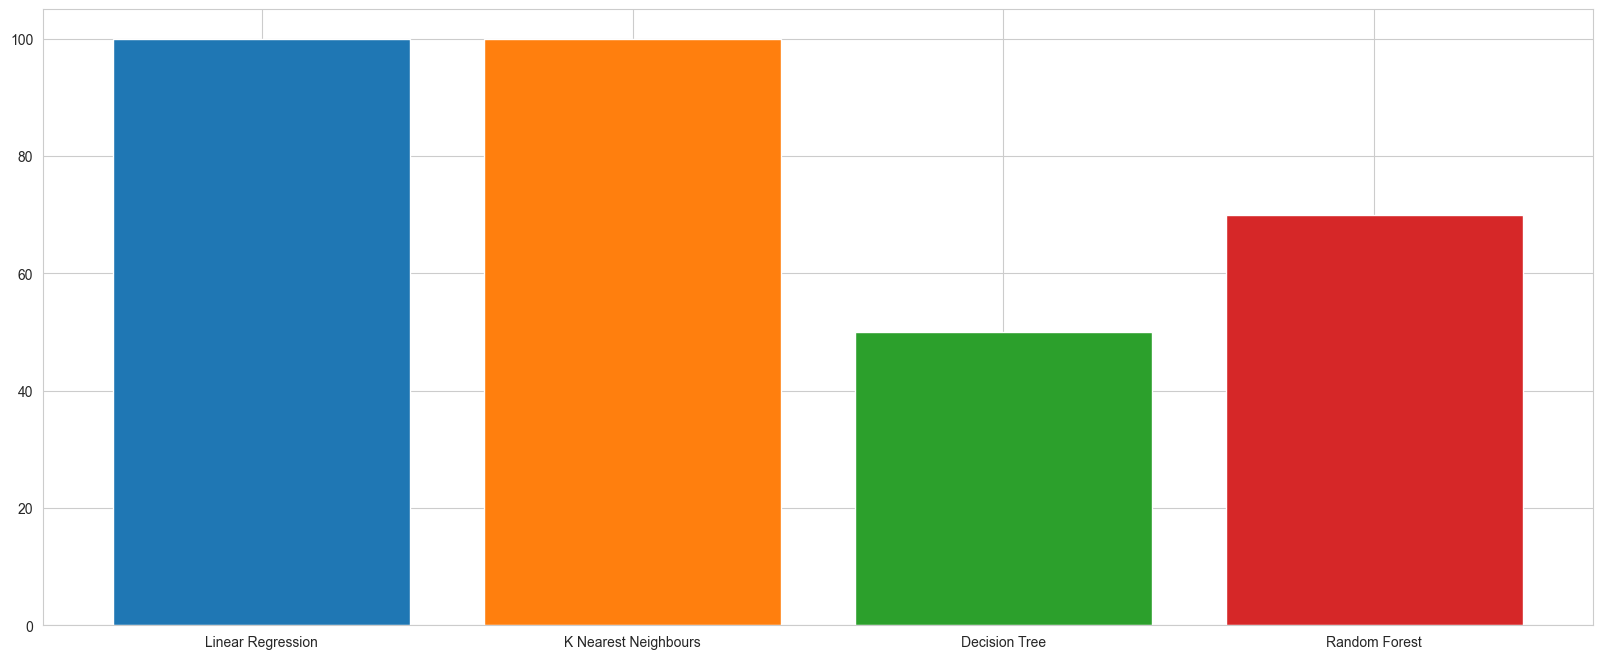

In [29]:
from sklearn.metrics import r2_score

for regressor_name, regressor in regressors:
 
    # Fit regressor to the training set
    regressor.fit(X_train, y_train)    
   
    # Predict 
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),1)*100
    

   
    # Evaluate  accuracy on the test set
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)
    